# Retrieving economic data from FAMA

xxx
https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/ todo


# Code sample

In [1]:
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets 
import datetime as dt
import matplotlib.pyplot as plt

# Retrieving all available datasets from the site

Using get_available_datasets(), you can extract the name for all available datasets - currently there are 297 different datasets available

In [3]:
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))
for i in datasets:
    print(i)

No. of datasets:297
F-F_Research_Data_Factors
F-F_Research_Data_Factors_weekly
F-F_Research_Data_Factors_daily
F-F_Research_Data_5_Factors_2x3
F-F_Research_Data_5_Factors_2x3_daily
Portfolios_Formed_on_ME
Portfolios_Formed_on_ME_Wout_Div
Portfolios_Formed_on_ME_Daily
Portfolios_Formed_on_BE-ME
Portfolios_Formed_on_BE-ME_Wout_Div
Portfolios_Formed_on_BE-ME_Daily
Portfolios_Formed_on_OP
Portfolios_Formed_on_OP_Wout_Div
Portfolios_Formed_on_OP_Daily
Portfolios_Formed_on_INV
Portfolios_Formed_on_INV_Wout_Div
Portfolios_Formed_on_INV_Daily
6_Portfolios_2x3
6_Portfolios_2x3_Wout_Div
6_Portfolios_2x3_weekly
6_Portfolios_2x3_daily
25_Portfolios_5x5
25_Portfolios_5x5_Wout_Div
25_Portfolios_5x5_Daily
100_Portfolios_10x10
100_Portfolios_10x10_Wout_Div
100_Portfolios_10x10_Daily
6_Portfolios_ME_OP_2x3
6_Portfolios_ME_OP_2x3_Wout_Div
6_Portfolios_ME_OP_2x3_daily
25_Portfolios_ME_OP_5x5
25_Portfolios_ME_OP_5x5_Wout_Div
25_Portfolios_ME_OP_5x5_daily
100_Portfolios_ME_OP_10x10
100_Portfolios_10x10_ME_

# Monthly returns for portfolios formed on market equity
Let's try to find the dataset which contains the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. 


In [8]:
df_ME = [dataset for dataset in datasets  if 'ME' in dataset in dataset ]
print(df_ME)

['Portfolios_Formed_on_ME', 'Portfolios_Formed_on_ME_Wout_Div', 'Portfolios_Formed_on_ME_Daily', 'Portfolios_Formed_on_BE-ME', 'Portfolios_Formed_on_BE-ME_Wout_Div', 'Portfolios_Formed_on_BE-ME_Daily', '6_Portfolios_ME_OP_2x3', '6_Portfolios_ME_OP_2x3_Wout_Div', '6_Portfolios_ME_OP_2x3_daily', '25_Portfolios_ME_OP_5x5', '25_Portfolios_ME_OP_5x5_Wout_Div', '25_Portfolios_ME_OP_5x5_daily', '100_Portfolios_ME_OP_10x10', '100_Portfolios_10x10_ME_OP_Wout_Div', '100_Portfolios_ME_OP_10x10_daily', '6_Portfolios_ME_INV_2x3', '6_Portfolios_ME_INV_2x3_Wout_Div', '6_Portfolios_ME_INV_2x3_daily', '25_Portfolios_ME_INV_5x5', '25_Portfolios_ME_INV_5x5_Wout_Div', '25_Portfolios_ME_INV_5x5_daily', '100_Portfolios_ME_INV_10x10', '100_Portfolios_10x10_ME_INV_Wout_Div', '100_Portfolios_ME_INV_10x10_daily', '25_Portfolios_BEME_OP_5x5', '25_Portfolios_BEME_OP_5x5_Wout_Div', '25_Portfolios_BEME_OP_5x5_daily', '25_Portfolios_BEME_INV_5x5', '25_Portfolios_BEME_INV_5x5_Wout_Div', '25_Portfolios_BEME_INV_5x5_da

In [10]:
ds_ME = web.DataReader('Portfolios_Formed_on_ME','famafrench', start='1963-07-01',end='2022-05-01')

In [12]:
print(type(ds_ME))
ds_ME.keys()
print(ds_ME['DESCR'])

<class 'dict'>
Portfolios Formed on ME
-----------------------

This file was created by CMPT_ME_RETS using the 202203 CRSP database. It contains value- and equal-weighted returns for size portfolios. Each record contains returns for: Negative (not used) 30% 40% 30%   5 Quintiles  10 Deciles The portfolios are constructed at the end of Jun. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Value Weight Returns -- Monthly (705 rows x 19 cols)
  1 : Equal Weight Returns -- Monthly (705 rows x 19 cols)
  2 : Value Weight Returns -- Annual from January to December (59 rows x 19 cols)
  3 : Equal Weight Returns -- Annual from January to December (59 rows x 19 cols)
  4 : Number of Firms in Portfolios (705 rows x 19 cols)
  5 : Average Firm Size (705 rows x 19 cols)


In [14]:
ds_ME[0].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1963-07,-99.99,-0.89,-1.41,0.07,-0.28,-1.42,-1.77,-1.36,0.22,-0.26,-0.30,-1.97,-0.98,-1.17,-2.21,-1.14,-1.49,-0.30,0.33
1963-08,-99.99,3.66,5.45,5.39,3.03,5.08,5.33,5.72,5.35,2.66,3.43,4.80,5.29,6.48,4.48,5.64,5.77,5.95,5.23
1963-09,-99.99,-1.30,-2.14,-1.18,-1.00,-1.91,-1.75,-2.24,-1.10,-0.20,-1.85,-1.84,-1.97,-1.96,-1.59,-2.65,-2.01,-2.08,-0.90
1963-10,-99.99,1.34,1.60,3.06,0.49,2.83,1.31,1.20,3.25,0.71,0.24,2.86,2.81,1.04,1.51,1.49,1.03,1.83,3.54
1963-11,-99.99,-1.54,-1.01,-0.48,-2.10,-1.28,-1.49,-0.28,-0.49,-2.13,-2.06,-0.54,-1.87,-1.26,-1.67,-0.12,-0.36,-0.21,-0.55


Let's only look at the returns for the companies with the smallest market capitalization ('Lo 10' - bottom decile) and largest market capitalization ('Hi 10'). 

In [17]:
cols = ['Lo 10', 'Hi 10']
returns = ds_ME[0][cols]
returns.head()

,Lo 10,Hi 10
Date,,
1963-07,-0.0026,0.0033
1963-08,0.0266,0.0523
1963-09,-0.0020,-0.0090
1963-10,0.0071,0.0354
1963-11,-0.0213,-0.0055


The data is returned in percentages and not real numbers so lets divide and plot the monthly returns - you will notice immediately that monthly returns for small caps are much more volatile 

<AxesSubplot:xlabel='Date'>

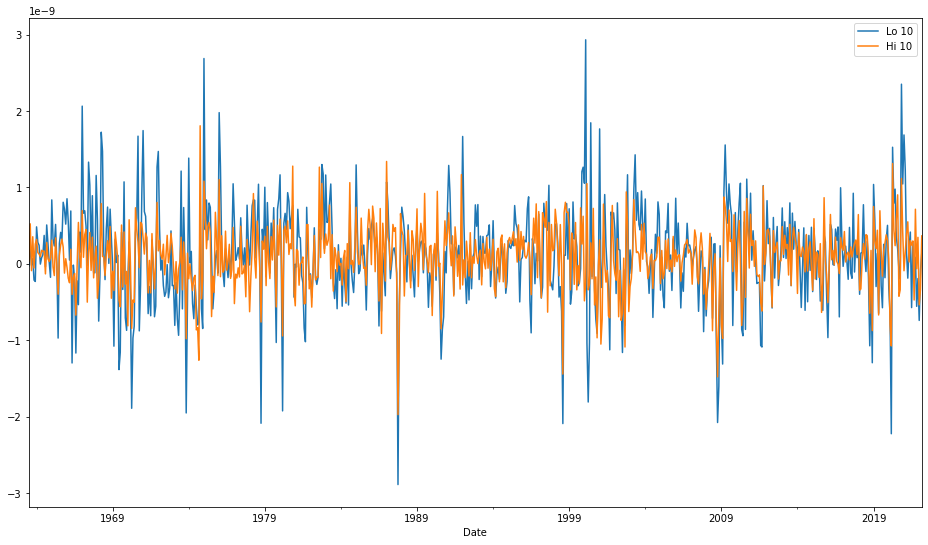

In [21]:
returns = returns/100
returns.head()
returns.plot(figsize=(16,9))